In [51]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import Adam as LegacyAdam
from tensorflow.keras.initializers import RandomNormal
import numpy as np
import matplotlib.pyplot as plt

In [52]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [53]:
x_train.shape

(60000, 28, 28)

In [54]:
x_test.shape

(10000, 28, 28)

In [55]:
x_train = x_train / 127.5 - 1
x_test = x_test / 127.5 - 1

In [56]:
x_train.min(), x_train.max()

(-1.0, 1.0)

In [57]:
x_train = x_train.reshape(-1, 784)
x_train.shape

(60000, 784)

In [58]:
NOISE_DIM = 10

In [59]:
adam = LegacyAdam(learning_rate=0.0002, beta_1=0.5)

In [60]:
generator = Sequential([
    Dense(256, input_dim=NOISE_DIM),
    LeakyReLU(0.2),
    Dense(512),
    LeakyReLU(0.2),
    Dense(1024),
    LeakyReLU(0.2),
    Dense(28*28, activation='tanh'),
])

generator.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 256)               2816      
                                                                 
 leaky_re_lu_24 (LeakyReLU)  (None, 256)               0         
                                                                 
 dense_33 (Dense)            (None, 512)               131584    
                                                                 
 leaky_re_lu_25 (LeakyReLU)  (None, 512)               0         
                                                                 
 dense_34 (Dense)            (None, 1024)              525312    
                                                                 
 leaky_re_lu_26 (LeakyReLU)  (None, 1024)              0         
                                                                 
 dense_35 (Dense)            (None, 784)              

In [61]:
discriminator = Sequential([
    Dense(1024, input_shape=(784,), kernel_initializer=RandomNormal(stddev=0.02)),
    LeakyReLU(0.2),
    Dropout(0.3),
    Dense(512),
    LeakyReLU(0.2),
    Dropout(0.3),
    Dense(256),
    LeakyReLU(0.2),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

discriminator.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 1024)              803840    
                                                                 
 leaky_re_lu_27 (LeakyReLU)  (None, 1024)              0         
                                                                 
 dropout_12 (Dropout)        (None, 1024)              0         
                                                                 
 dense_37 (Dense)            (None, 512)               524800    
                                                                 
 leaky_re_lu_28 (LeakyReLU)  (None, 512)               0         
                                                                 
 dropout_13 (Dropout)        (None, 512)               0         
                                                                 
 dense_38 (Dense)            (None, 256)              

In [62]:
discriminator.compile(loss='binary_crossentropy', optimizer=adam)

In [63]:
discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM,)) ##10차원
x = generator(inputs=gan_input)
output = discriminator(x)

In [64]:
gan = Model(gan_input, output)

gan.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 10)]              0         
                                                                 
 sequential_8 (Sequential)   (None, 784)               1463312   
                                                                 
 sequential_9 (Sequential)   (None, 1)                 1460225   
                                                                 
Total params: 2923537 (11.15 MB)
Trainable params: 1463312 (5.58 MB)
Non-trainable params: 1460225 (5.57 MB)
_________________________________________________________________


In [65]:
gan.compile(loss='binary_crossentropy', optimizer=adam)

In [66]:
def get_batches(data, batch_size):
    batches = []
    for i in range(int(data.shape[0] // batch_size)):
        batch = data[i * batch_size : (i + 1) * batch_size]
        batches.append(batch)
    return np.asarray(batches)

In [67]:
x_train.shape

(60000, 784)

In [68]:
get_batches(x_train, 10).shape

(6000, 10, 784)

In [69]:
def visualize_training(epoch, d_losses, g_losses):
    # 오차에 대한 시각화
    plt.figure(figsize=(8, 4))
    plt.plot(d_losses, label='Discriminator Loss')
    plt.plot(g_losses, label='Generatror Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    print('epoch: {}, Discriminator Loss: {}, Generator Loss: {}'.format(epoch, np.asarray(d_losses).mean(), np.asarray(g_losses).mean()))

    #샘플 데이터 생성 후 시각화
    noise = np.random.normal(0, 1, size=(24, NOISE_DIM))
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(-1, 28, 28)

    plt.figure(figsize=(8, 4))

    for i in range(generated_images.shape[0]):
        plt.subplot(4, 6, i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [70]:
BATCH_SIZE = 256
EPOCHS= 50

In [71]:
d_losses = []
g_losses = []

8/8 [==============================] - 0s 6ms/step


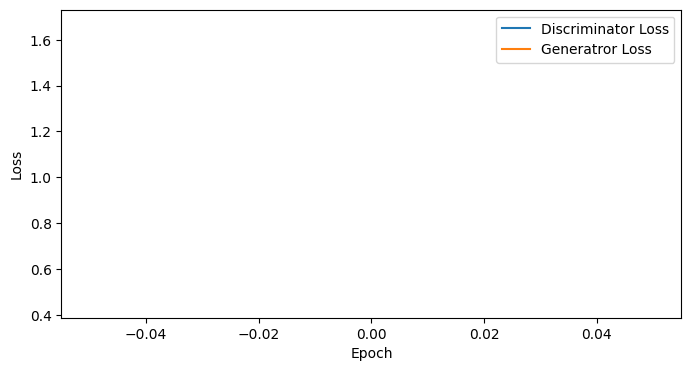

epoch: 1, Discriminator Loss: 0.4484163224697113, Generator Loss: 1.6700867414474487
1/1 [==============================] - 0s 72ms/step


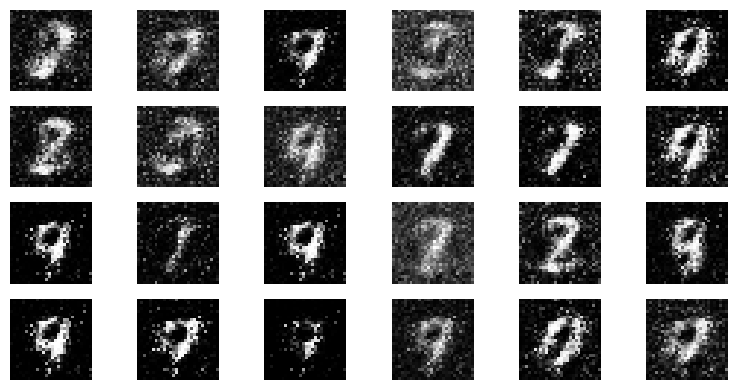

8/8 [==============================] - 0s 7ms/step


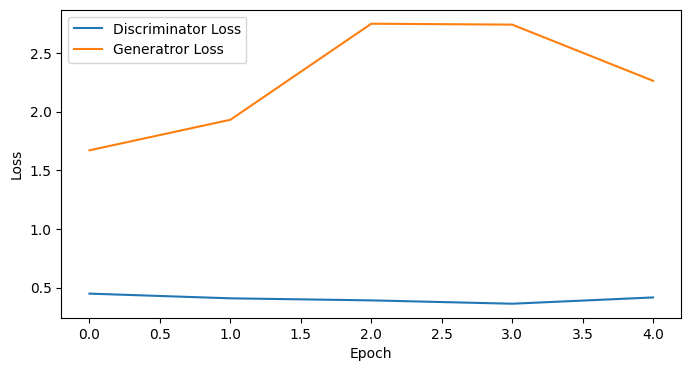

epoch: 5, Discriminator Loss: 0.40519351959228517, Generator Loss: 2.270851421356201
1/1 [==============================] - 0s 37ms/step


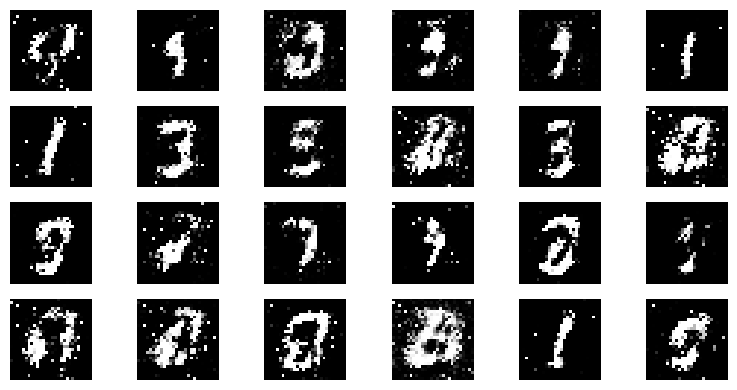

8/8 [==============================] - 0s 7ms/step


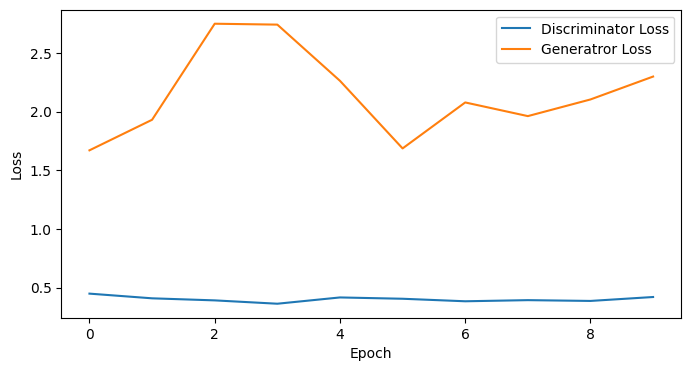

epoch: 10, Discriminator Loss: 0.401248636841774, Generator Loss: 2.1483164191246034
1/1 [==============================] - 0s 22ms/step


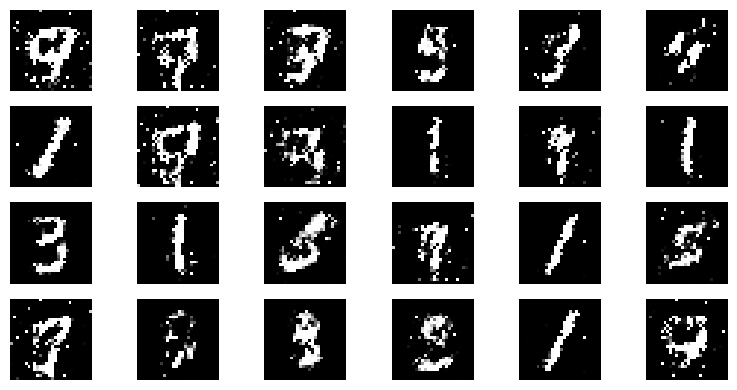

8/8 [==============================] - 0s 5ms/step


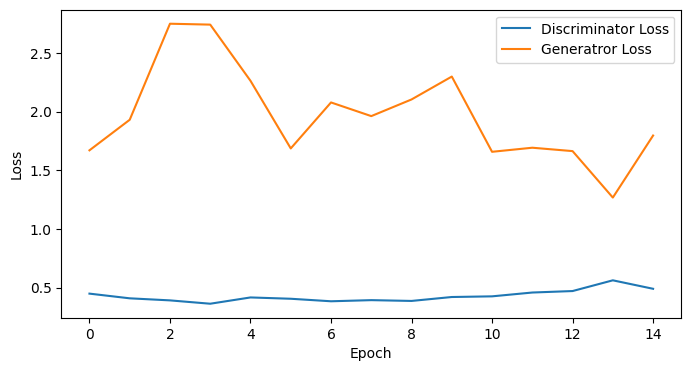

epoch: 15, Discriminator Loss: 0.4278352955977122, Generator Loss: 1.970649035771688
1/1 [==============================] - 0s 22ms/step


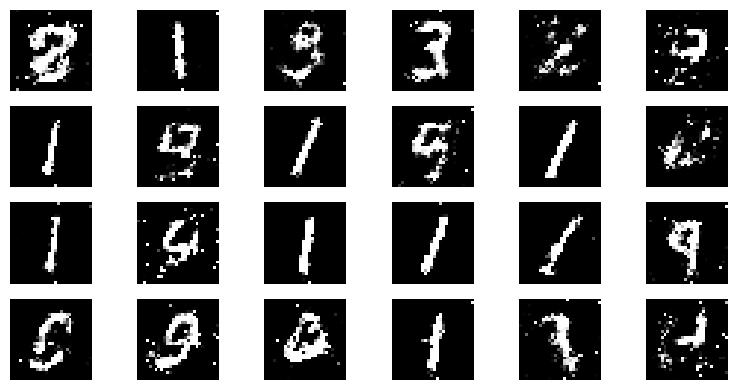

8/8 [==============================] - 0s 6ms/step


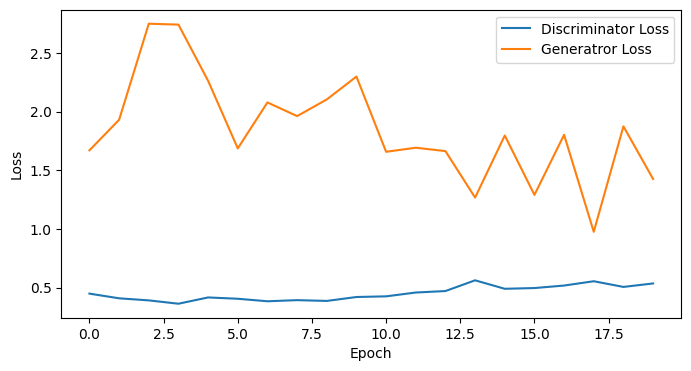

epoch: 20, Discriminator Loss: 0.4512802764773369, Generator Loss: 1.8464012622833252
1/1 [==============================] - 0s 41ms/step


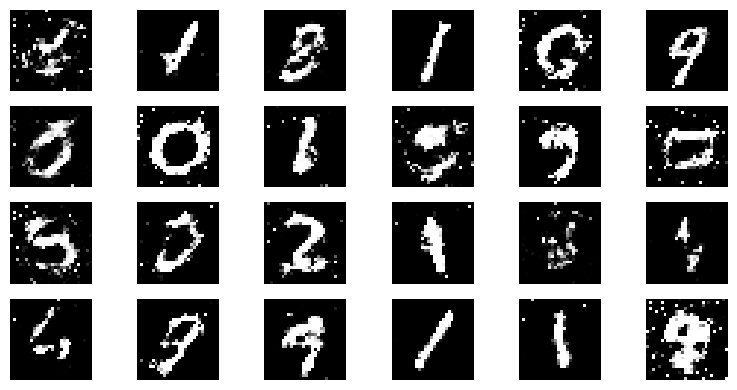

8/8 [==============================] - 0s 5ms/step


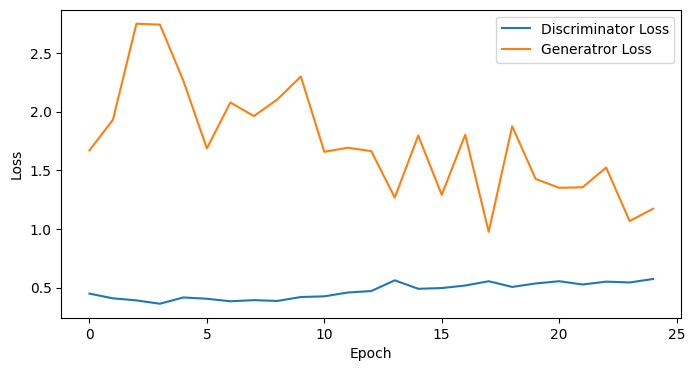

epoch: 25, Discriminator Loss: 0.47093845963478087, Generator Loss: 1.7358493661880494
1/1 [==============================] - 0s 42ms/step


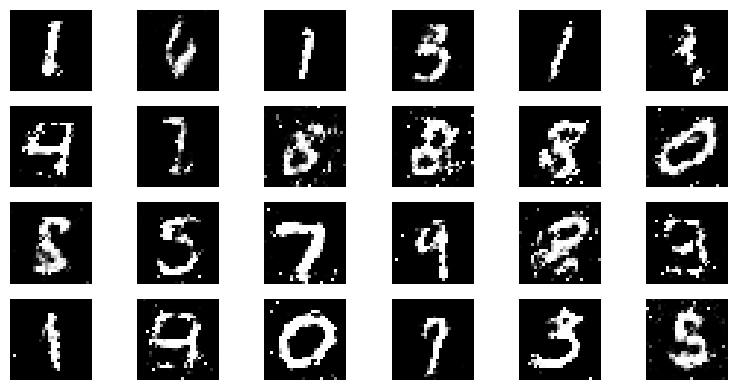

8/8 [==============================] - 0s 7ms/step


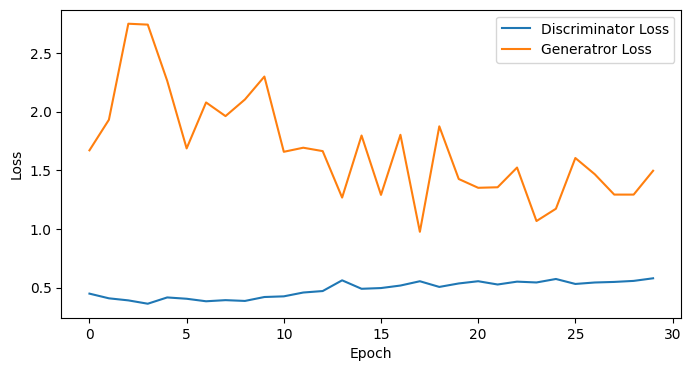

epoch: 30, Discriminator Loss: 0.48439866602420806, Generator Loss: 1.6849338293075562
1/1 [==============================] - 0s 27ms/step


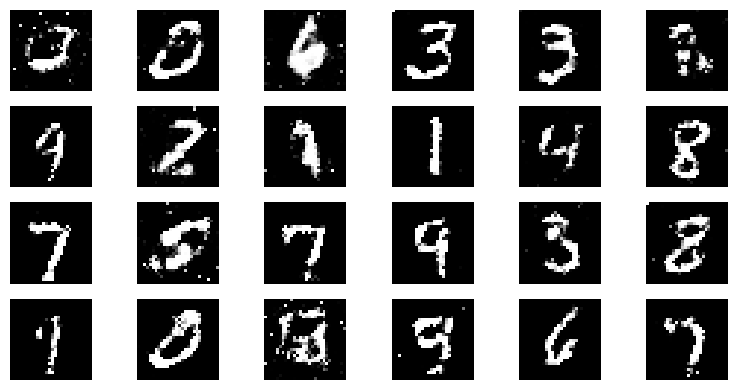

8/8 [==============================] - 0s 8ms/step


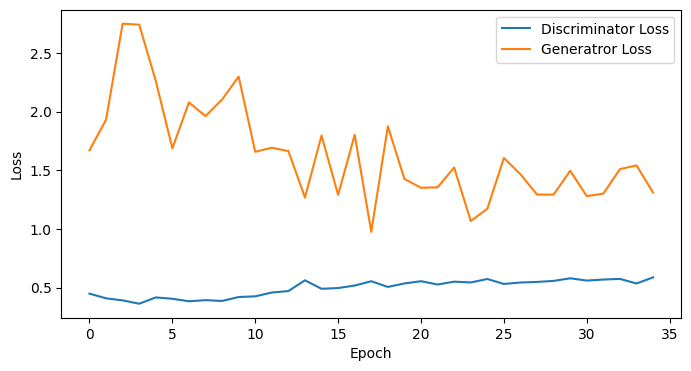

epoch: 35, Discriminator Loss: 0.49588955896241327, Generator Loss: 1.6425624370574952
1/1 [==============================] - 0s 24ms/step


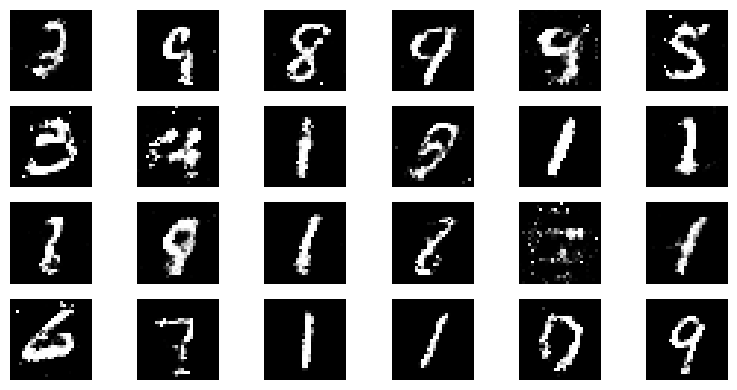

8/8 [==============================] - 0s 8ms/step


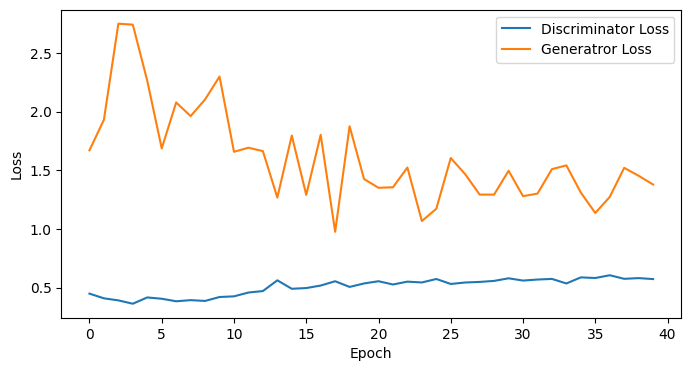

epoch: 40, Discriminator Loss: 0.5067697651684284, Generator Loss: 1.606250786781311
1/1 [==============================] - 0s 31ms/step


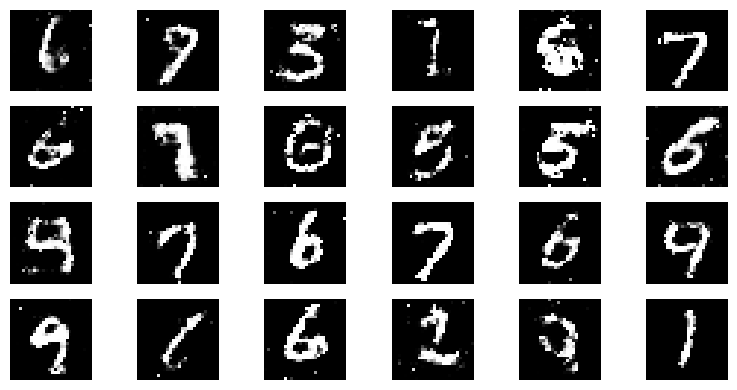

8/8 [==============================] - 0s 7ms/step


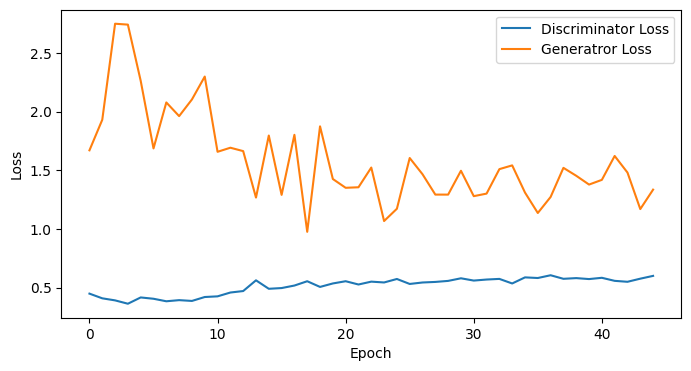

epoch: 45, Discriminator Loss: 0.5141464836067624, Generator Loss: 1.5838873863220215
1/1 [==============================] - 0s 22ms/step


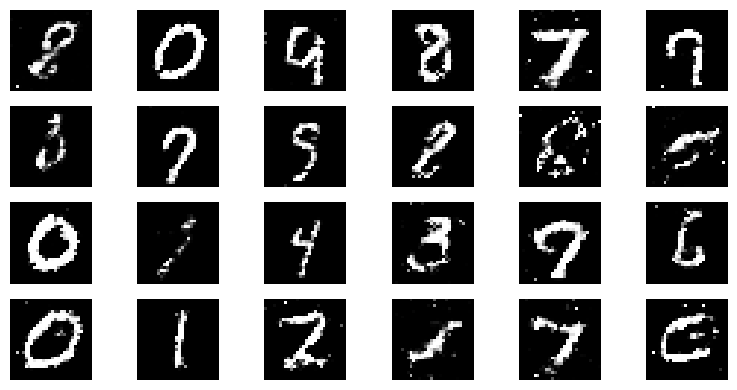

8/8 [==============================] - 0s 11ms/step


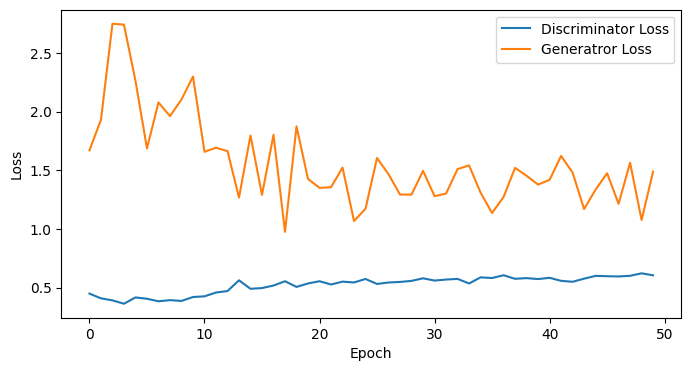

epoch: 50, Discriminator Loss: 0.5230952090024948, Generator Loss: 1.561860649585724
1/1 [==============================] - 0s 28ms/step


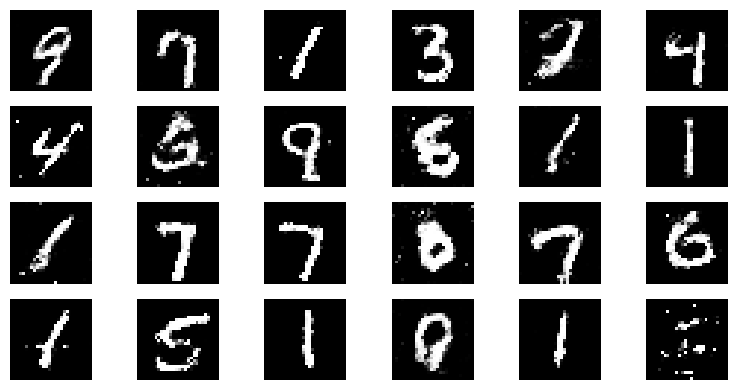

In [72]:
# discriminator와 gan 모델의 loss 측정을 위한 list 입니다.
d_losses = []
g_losses = []

for epoch in range(1, EPOCHS + 1):
    # 각 배치별 학습
    for real_images in get_batches(x_train, BATCH_SIZE):
        # 랜덤 노이즈 생성
        input_noise = np.random.uniform(-1, 1, size=[BATCH_SIZE, NOISE_DIM])

        # 가짜 이미지 데이터 생성
        generated_images = generator.predict(input_noise)

        # Gan에 학습할 X 데이터 정의
        x_dis = np.concatenate([real_images, generated_images])

        # Gan에 학습할 Y 데이터 정의
        y_dis = np.zeros(2 * BATCH_SIZE)
        y_dis[:BATCH_SIZE] = 0.9

        # Discriminator 훈련
        discriminator.trainable = True
        d_loss = discriminator.train_on_batch(x_dis, y_dis)

        # Gan 훈련
        noise = np.random.uniform(-1, 1, size=[BATCH_SIZE, NOISE_DIM])
        y_gan = np.ones(BATCH_SIZE)

        # Discriminator의 판별 학습을 방지합니다
        discriminator.trainable = False
        g_loss = gan.train_on_batch(noise, y_gan)

    d_losses.append(d_loss)
    g_losses.append(g_loss)

    if epoch == 1 or epoch % 5 == 0:
        visualize_training(epoch, d_losses, g_losses)